In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Read data

In [24]:
test_df=pd.read_csv(r'Data\Preprocessed\credit_test.csv', index_col=0, low_memory=False)
train_df=pd.read_csv(r'Data\Preprocessed\credit_train.csv', index_col=0)

# Process data for analysis

In [3]:
train_df['data_set_type'] = 'train'
test_df['data_set_type'] = 'test'
train_test_df = pd.concat([train_df, test_df]).copy()
train_test_df.drop(['open_account_flg'], axis=1, inplace=True)

In [4]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248465 entries, 0 to 87128
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             248465 non-null  int64  
 1   gender                248465 non-null  object 
 2   age                   248465 non-null  int64  
 3   marital_status        248465 non-null  object 
 4   job_position          248465 non-null  object 
 5   credit_sum            248465 non-null  float64
 6   credit_month          248465 non-null  int64  
 7   tariff_id             248465 non-null  float64
 8   score_shk             248465 non-null  float64
 9   education             248465 non-null  object 
 10  living_region         248465 non-null  object 
 11  monthly_income        248465 non-null  float64
 12  credit_count          248465 non-null  float64
 13  overdue_credit_count  248465 non-null  float64
 14  data_set_type         248465 non-null  object 
dtypes: flo

In [5]:
columns_list=list(train_test_df.select_dtypes(include=['int', 'float']).columns[1:])
columns_list

['age',
 'credit_sum',
 'credit_month',
 'tariff_id',
 'score_shk',
 'monthly_income',
 'credit_count',
 'overdue_credit_count']

# Analisys for classification

## Gender analysis

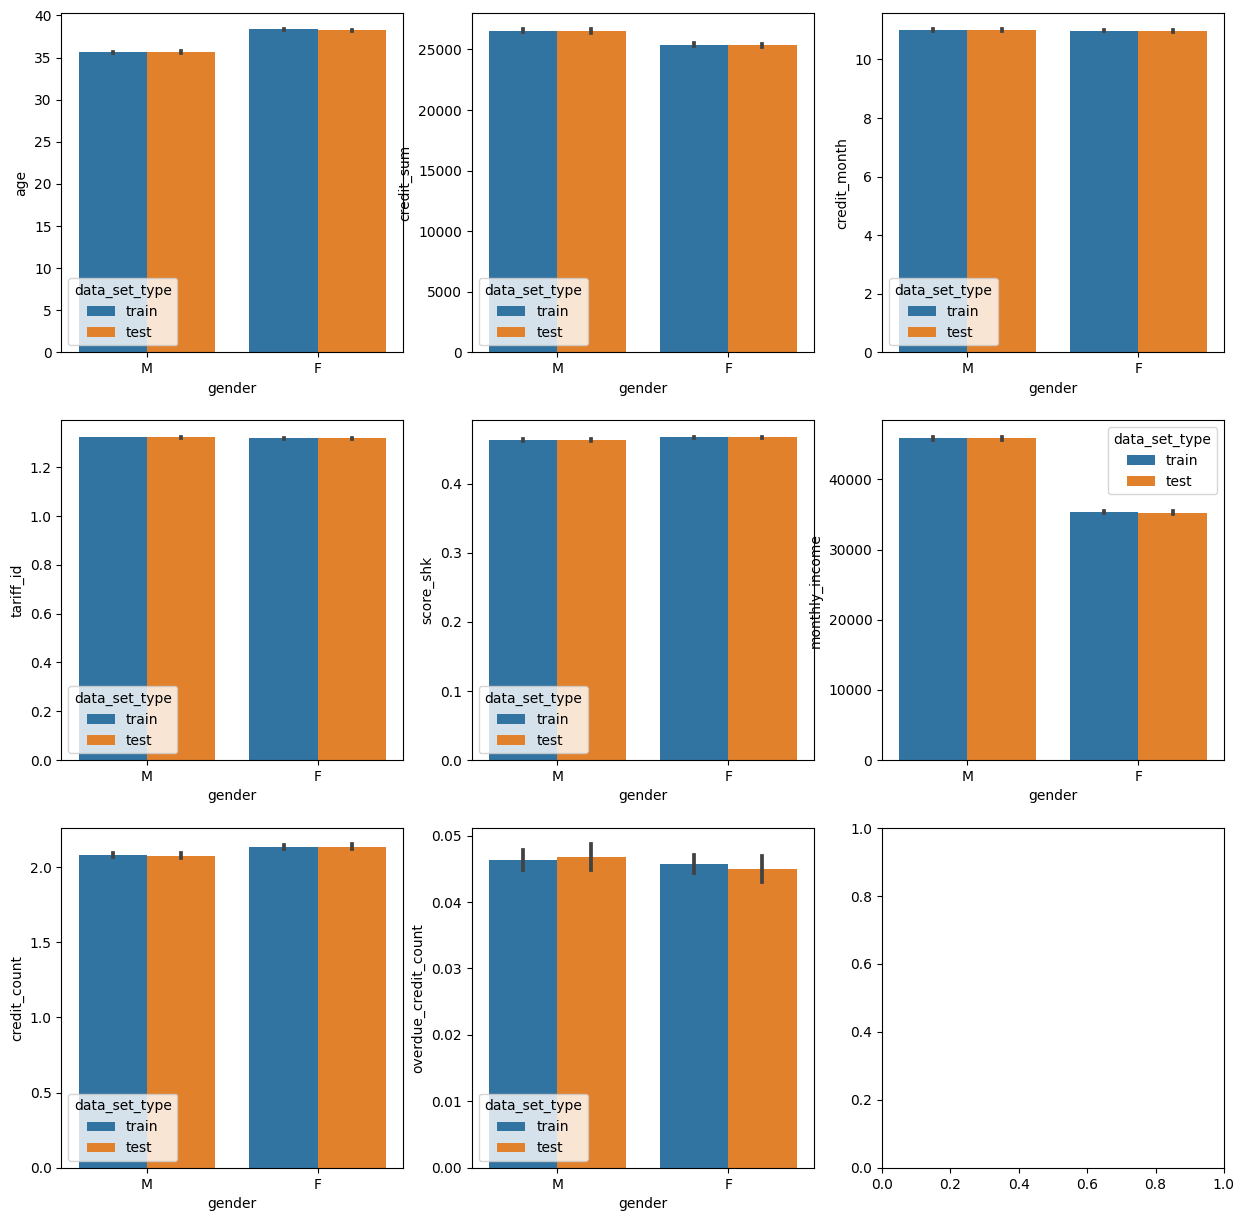

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for column, axs in zip(columns_list, axes.flatten()):
    sns.barplot(train_test_df, x='gender', y=column, hue='data_set_type', ax=axs)

По обучающему и тренировочному датасету гендерные показатели близки. Следует отметить, что средний доход женщин ожидаемо ниже среднего дохода мужчин. В задаче кредитного скоринга может быть необходимо диверсифицировать выборки, в соответствии с текущей экономической ситуацией.

## Marital status analysis

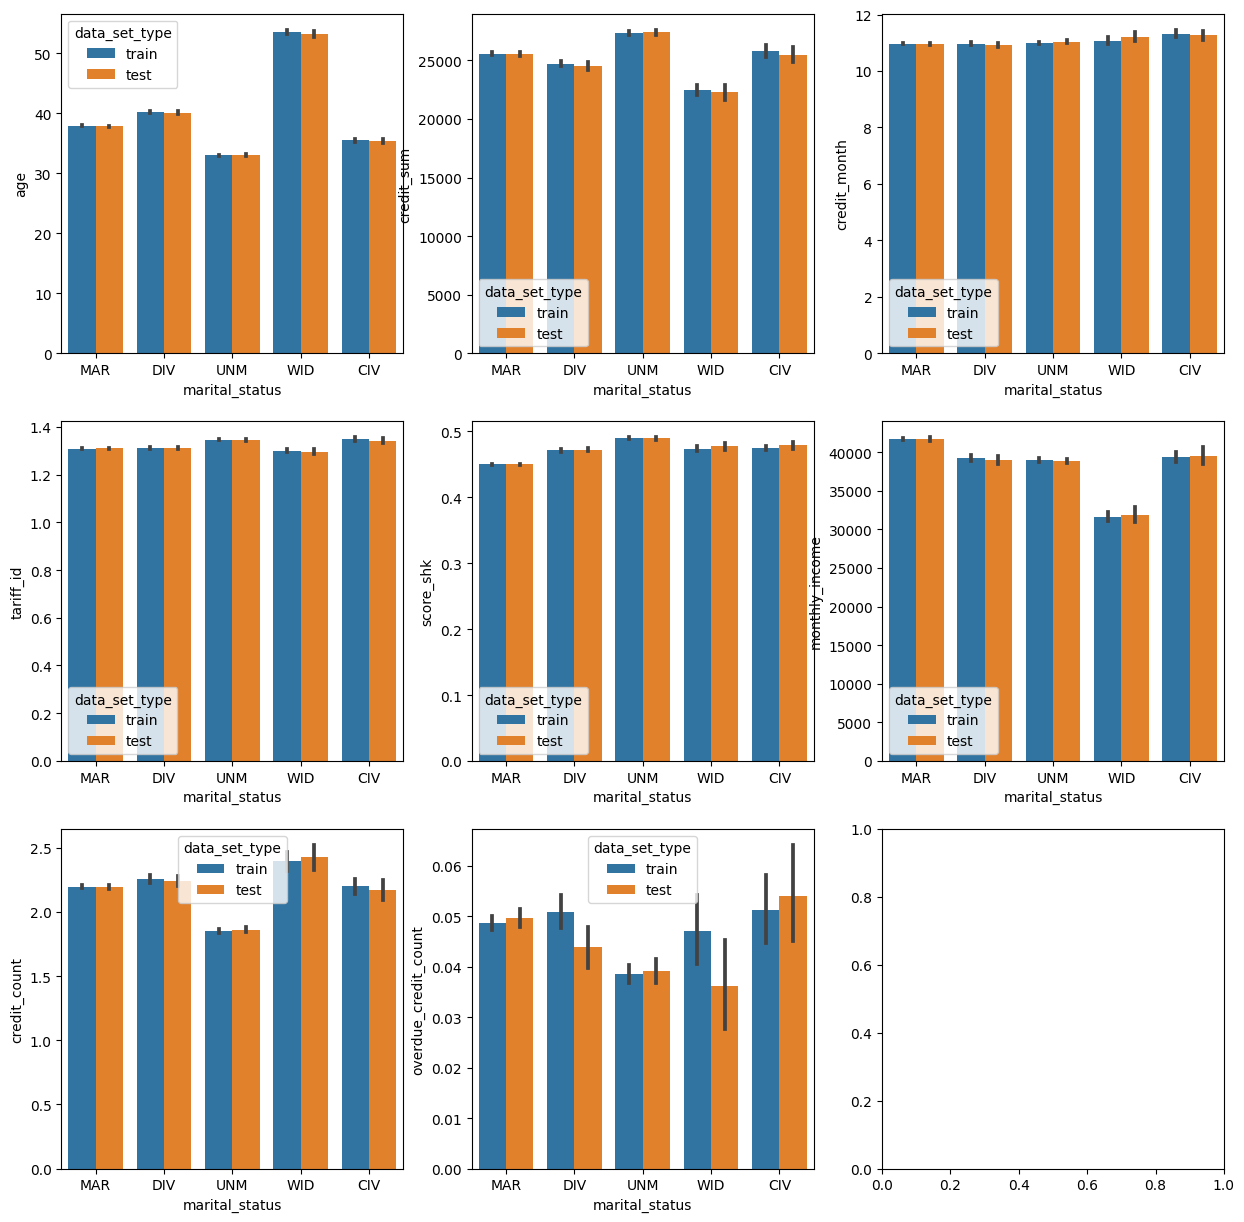

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for column, axs in zip(columns_list, axes.flatten()):
    sns.barplot(train_test_df, x='marital_status', y=column, hue='data_set_type', ax=axs)

Гражданский статус имеет влияение на большинство других фитч. В задаче классификации эту фитчу можно исключить, так как векторизированный с применением ранжирования по другим - зависимым фитчам, гражданский статус будет коррелировать с зависимыми фитчами.

## Job position analysis

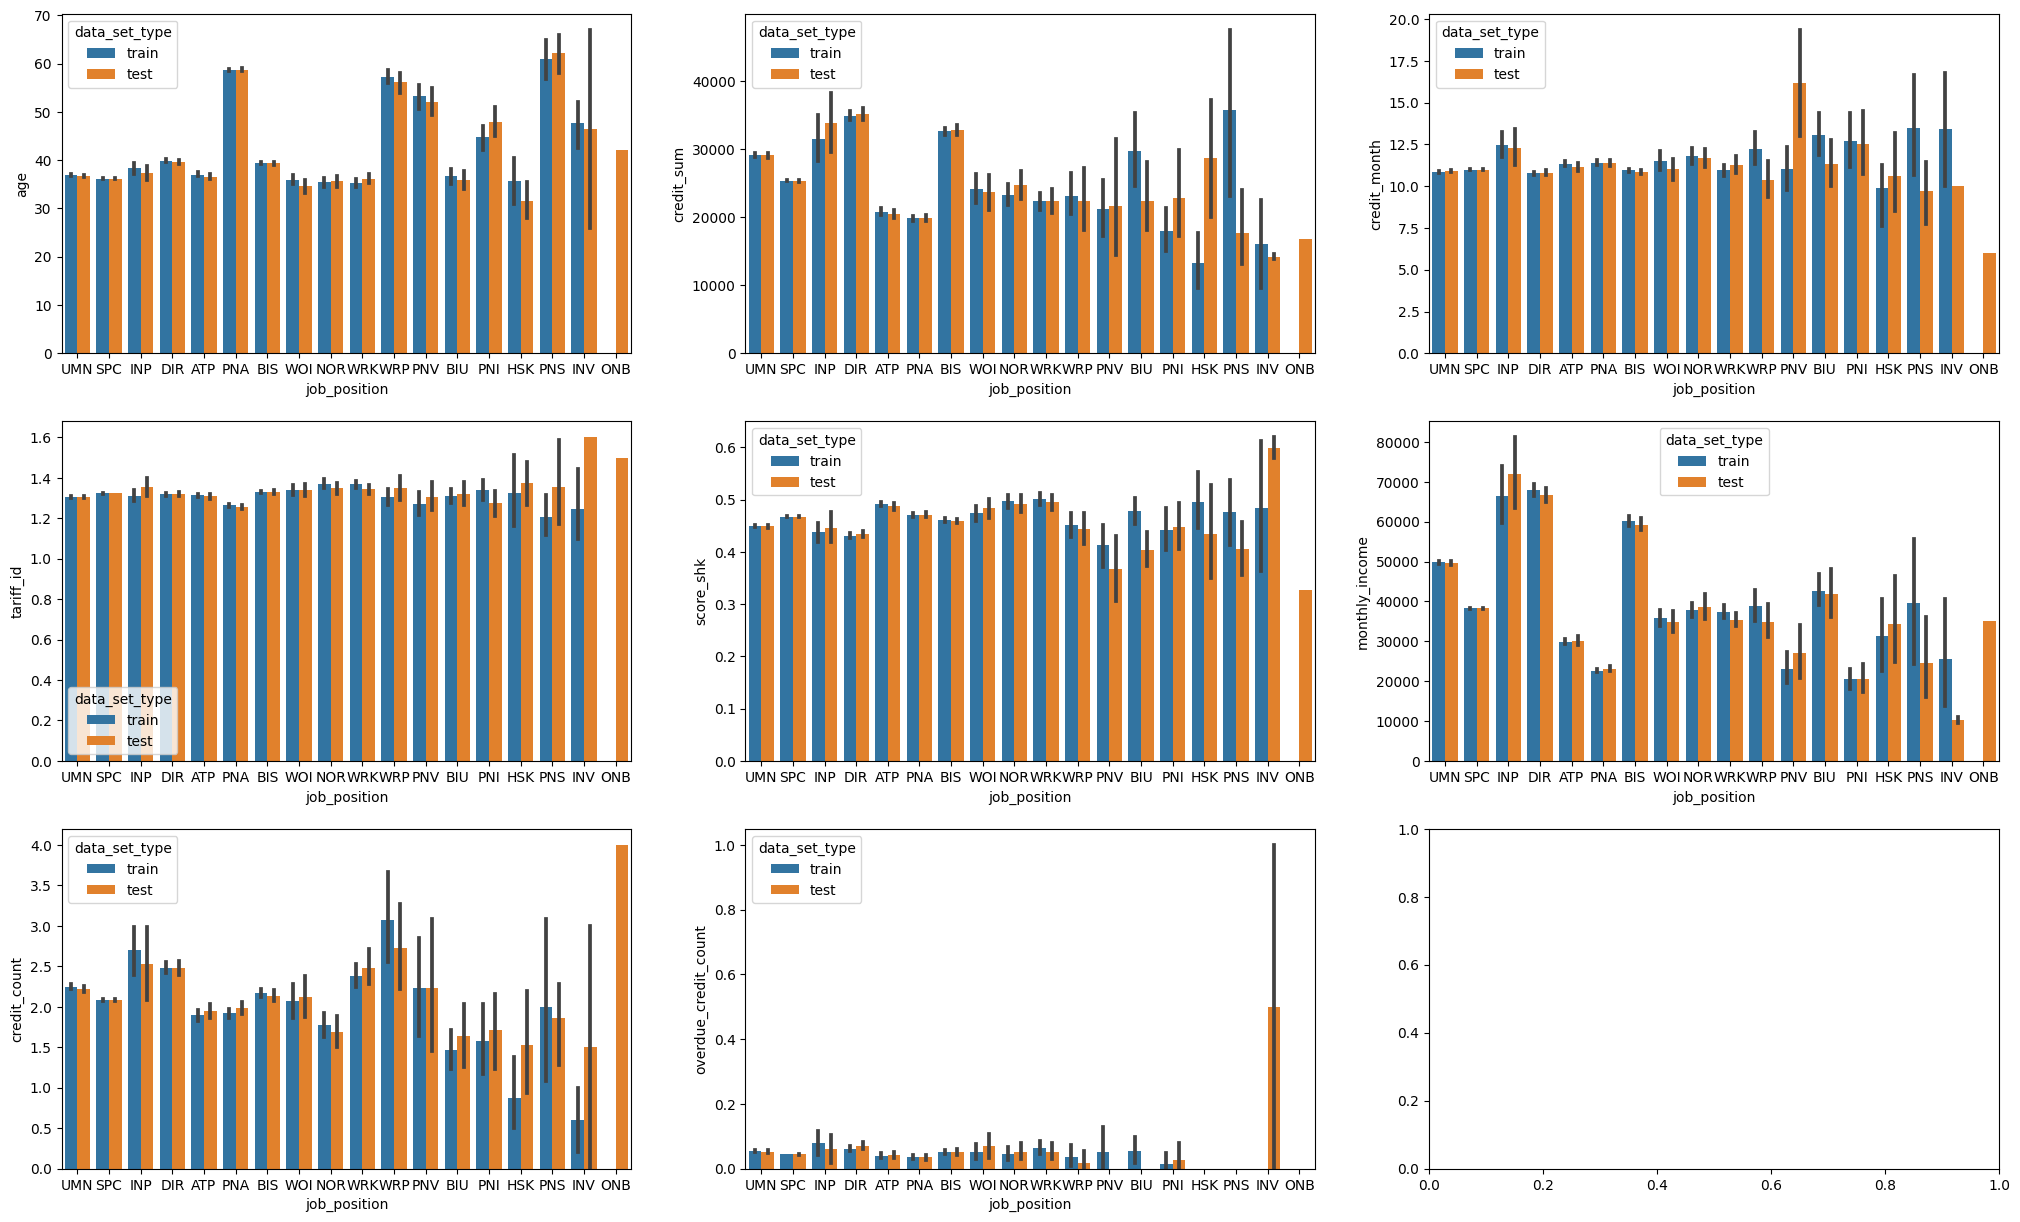

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
for column, axs in zip(columns_list, axes.flatten()):
    sns.barplot(train_test_df, x='job_position', y=column, hue='data_set_type', ax=axs)

Карьерную позицию можно не использовать в задаче классификации, так как информация содержащаяся в ней содержится в других фитчах. Следует обратить внимание, на то, что в тестовом наборе данных присутствует карьерная позиция отсутствующая в тренировочных данных. Это может привести к ухущению показателей классификации, если эту фитчу оставить полностью.

## Education analysis

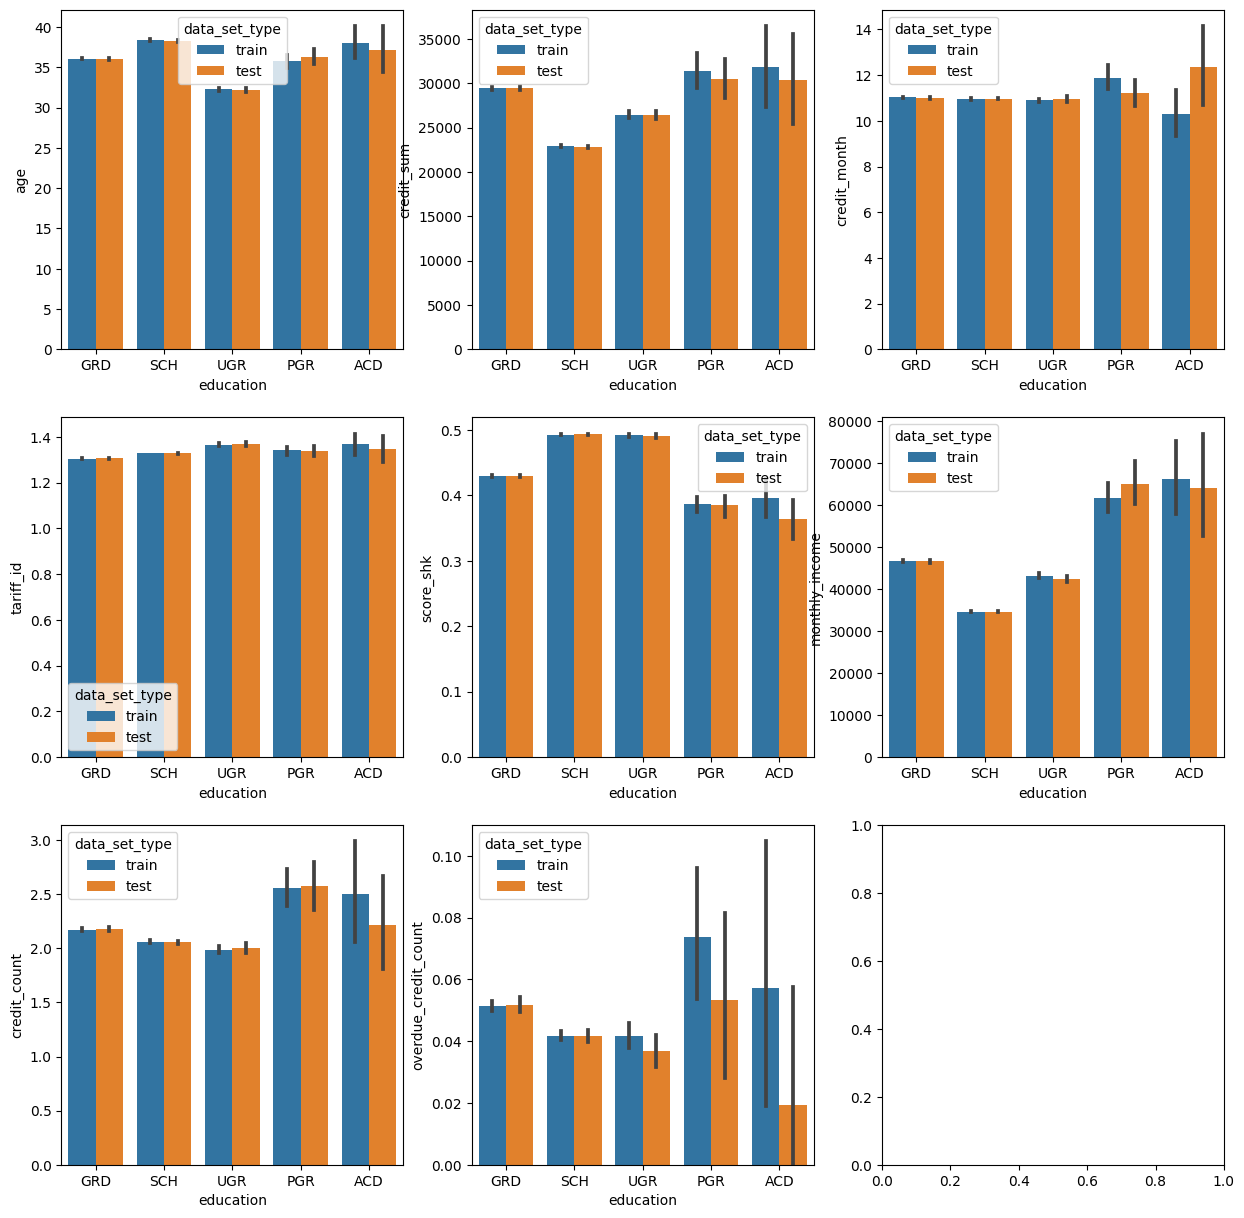

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for column, axs in zip(columns_list, axes.flatten()):
    sns.barplot(train_test_df, x='education', y=column, hue='data_set_type', ax=axs)

Данную фитчу можно не использовать в задаче классификации, так как она имеет явное влияние на другие фитчи.

## Train dataset analysis

In [10]:
train_df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,data_set_type
0,1,M,48,MAR,UMN,59998.00,10,1.60,0.770249,GRD,32300,30000.0,1.0,1.0,0,train
1,2,F,28,MAR,UMN,10889.00,6,1.10,0.248514,GRD,37700,43000.0,2.0,0.0,0,train
2,3,M,32,MAR,SPC,10728.00,12,1.10,0.459589,SCH,46400,23000.0,5.0,0.0,0,train
3,4,F,27,DIV,SPC,12009.09,12,1.10,0.362536,GRD,33400,17000.0,2.0,0.0,0,train
4,5,M,45,MAR,SPC,16908.89,10,1.10,0.421385,SCH,57400,25000.0,1.0,0.0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161331,170742,F,27,UNM,SPC,64867.00,12,1.10,0.535257,GRD,31600,40000.0,6.0,0.0,0,train
161332,170743,F,24,MAR,SPC,17640.00,6,1.60,0.573287,SCH,37800,30000.0,1.0,0.0,0,train
161333,170744,F,31,UNM,SPC,27556.47,10,1.32,0.416098,GRD,102500,40000.0,1.0,0.0,0,train
161334,170745,F,53,DIV,PNA,6189.00,12,1.10,0.482595,SCH,35800,31000.0,2.0,0.0,0,train


In [11]:
train_df.groupby('gender')['open_account_flg'].sum()

gender
F    12814
M    13790
Name: open_account_flg, dtype: int64

Судя по статистике открытых кредитов пропорция между мужчинами и женщинами соблюдается. Вышеизложенное предположение о диверсификации не подтверждается.

In [12]:
train_df.groupby('marital_status')['open_account_flg'].sum()

marital_status
CIV      761
DIV     2967
MAR    13687
UNM     8466
WID      723
Name: open_account_flg, dtype: int64

In [13]:
train_df.groupby('job_position')['open_account_flg'].sum()

job_position
ATP      670
BIS      811
BIU       40
DIR      525
HSK        2
INP       64
INV        4
NOR      145
PNA     1459
PNI       19
PNS        6
PNV        9
SPC    19624
UMN     3020
WOI       75
WRK      108
WRP       23
Name: open_account_flg, dtype: int64

In [14]:
train_df.groupby('education')['open_account_flg'].sum()

education
ACD       23
GRD     9415
PGR      103
SCH    15659
UGR     1404
Name: open_account_flg, dtype: int64

<Axes: xlabel='score_shk', ylabel='Count'>

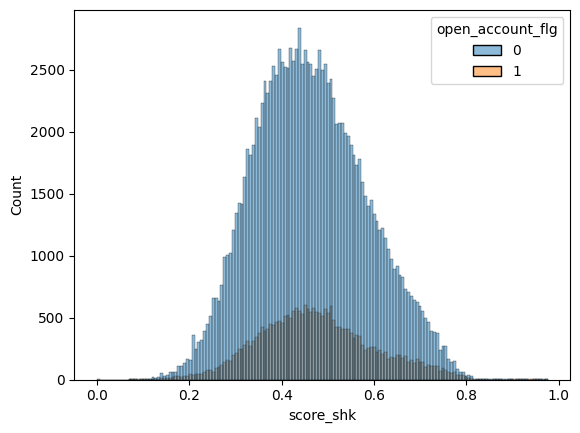

In [34]:
sns.histplot(data=train_df, x='score_shk', hue='open_account_flg')

Судя по колокообразной форме распределения данной фитчи, можно предполажить, что она подчитяется сдвинутому нормальному распределению или распределеню Пуассона. Похоже на обобщённый показатель кредитоспособности клиентов.

# Data processing

In [27]:
drop_list=list(train_df.select_dtypes('object').columns)[1:]

In [30]:
def OneHotTransform(df: pd.DataFrame, col_name: str)->pd.DataFrame:
    encoder = OneHotEncoder(sparse_output=False)
    col_encoded = encoder.fit_transform(df[[col_name]])
    encoded_df = pd.concat([df.drop(columns=[col_name]), pd.DataFrame(col_encoded, columns=encoder.get_feature_names_out([col_name]))], axis=1)
    return encoded_df

## Train set

In [28]:
train_df.drop(drop_list, axis=1, inplace=True)
train_df.drop(['client_id'], axis=1, inplace=True)
train_df

,gender,age,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,48,59998.00,10,1.60,0.770249,32300,30000.0,1.0,1.0,0
1,F,28,10889.00,6,1.10,0.248514,37700,43000.0,2.0,0.0,0
2,M,32,10728.00,12,1.10,0.459589,46400,23000.0,5.0,0.0,0
3,F,27,12009.09,12,1.10,0.362536,33400,17000.0,2.0,0.0,0
4,M,45,16908.89,10,1.10,0.421385,57400,25000.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
161331,F,27,64867.00,12,1.10,0.535257,31600,40000.0,6.0,0.0,0
161332,F,24,17640.00,6,1.60,0.573287,37800,30000.0,1.0,0.0,0
161333,F,31,27556.47,10,1.32,0.416098,102500,40000.0,1.0,0.0,0
161334,F,53,6189.00,12,1.10,0.482595,35800,31000.0,2.0,0.0,0


In [31]:
train_df=OneHotTransform(train_df, 'gender')
train_df

,age,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,gender_M
0,48,59998.00,10,1.60,0.770249,32300,30000.0,1.0,1.0,0,0.0,1.0
1,28,10889.00,6,1.10,0.248514,37700,43000.0,2.0,0.0,0,1.0,0.0
2,32,10728.00,12,1.10,0.459589,46400,23000.0,5.0,0.0,0,0.0,1.0
3,27,12009.09,12,1.10,0.362536,33400,17000.0,2.0,0.0,0,1.0,0.0
4,45,16908.89,10,1.10,0.421385,57400,25000.0,1.0,0.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
161331,27,64867.00,12,1.10,0.535257,31600,40000.0,6.0,0.0,0,1.0,0.0
161332,24,17640.00,6,1.60,0.573287,37800,30000.0,1.0,0.0,0,1.0,0.0
161333,31,27556.47,10,1.32,0.416098,102500,40000.0,1.0,0.0,0,1.0,0.0
161334,53,6189.00,12,1.10,0.482595,35800,31000.0,2.0,0.0,0,1.0,0.0


## Test set

In [32]:
test_df.drop(drop_list, axis=1, inplace=True)
test_df.drop(['client_id'], axis=1, inplace=True)
test_df=OneHotTransform(test_df, 'gender')
test_df

,age,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,gender_F,gender_M
0,48,16558.00,10,1.10,0.370409,71900,34000,2.0,0.0,1.0,0.0
1,29,7028.72,6,1.40,0.377281,74200,19000,3.0,0.0,0.0,1.0
2,20,13019.00,10,1.60,0.538515,33100,25000,1.0,0.0,1.0,0.0
3,41,9379.00,10,1.10,0.482520,83800,30000,0.0,0.0,1.0,0.0
4,31,13990.00,6,1.43,0.485914,34300,20000,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
87124,39,18168.00,12,1.10,0.564620,31600,30000,2.0,0.0,0.0,1.0
87125,41,10114.00,12,1.90,0.347262,37800,30000,1.0,0.0,0.0,1.0
87126,33,14807.00,6,1.60,0.404430,33200,30000,0.0,0.0,0.0,1.0
87127,25,19718.00,10,1.40,0.341982,36000,20000,1.0,0.0,1.0,0.0


# Correlation analysis

In [54]:
train_df.corr()

,gender,age,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
gender,1.000000,0.129878,-0.035436,-0.002935,-0.012122,0.015298,0.016833,-0.206151,0.014804,-0.001453,-0.035201
age,0.129878,1.000000,-0.084520,0.007051,-0.100739,-0.139706,0.013979,-0.029381,0.116564,0.007876,0.005172
credit_sum,-0.035436,-0.084520,1.000000,0.229225,0.091536,0.048775,-0.019052,0.356516,0.015838,-0.003882,-0.077267
credit_month,-0.002935,0.007051,0.229225,1.000000,-0.050181,0.042568,-0.016725,0.007146,0.050429,0.006463,0.022515
tariff_id,-0.012122,-0.100739,0.091536,-0.050181,1.000000,0.383147,-0.017224,0.016380,-0.053773,0.086693,-0.072425
score_shk,0.015298,-0.139706,0.048775,0.042568,0.383147,1.000000,0.040044,-0.103007,-0.093912,0.170533,0.037868
living_region,0.016833,0.013979,-0.019052,-0.016725,-0.017224,0.040044,1.000000,0.032914,0.049514,0.013224,0.028358
monthly_income,-0.206151,-0.029381,0.356516,0.007146,0.016380,-0.103007,0.032914,1.000000,0.146417,0.033679,-0.016508
credit_count,0.014804,0.116564,0.015838,0.050429,-0.053773,-0.093912,0.049514,0.146417,1.000000,0.177269,0.036008
overdue_credit_count,-0.001453,0.007876,-0.003882,0.006463,0.086693,0.170533,0.013224,0.033679,0.177269,1.000000,0.023492


В данном случае следует обратить внимание, что не категориальные фитчи не имеют высоких коэффициентов корреляции, что позволяет судить об отсутствии мультиколлинеарности. Имеющиеся не категориальные фитчи можно использовать в машинном обучении совместно.

## Save data

In [33]:
train_df.to_csv(r'Data\Processed\credit_train.csv')
test_df.to_csv(r'Data\Processed\credit_test.csv')